<a href="https://colab.research.google.com/github/priyarane879/Cardiovascular_risk_prediction/blob/main/Priya_Naik_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Priya Nilesh Naik
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham , Massachusetts.I have to build the machine learning model to predict whether the patient has a 10-yar risk of future coronary heart disease(CHD)**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import Libraries

import more_itertools
import numpy as np
import pandas as pd
from numpy import math
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
#connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
dataset_cardio = pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Classification/data_cardiovascular_risk.csv')

### Dataset First View

In [ ]:
# Dataset First Look
# checking 1st 5 row of dataframe
dataset_cardio.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# checking last 5 row of dataframe
dataset_cardio.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
#dataframe.shape function gives us number of column and rows.
dataset_cardio.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info
#using info method we get information about columns, its dtypes, number of entries , number of non-null values.
dataset_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
#Checking for duplicate rows in dataframe
len(dataset_cardio[dataset_cardio.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Count of missing values of each column
dataset_cardio.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# Count missing values in the dataset
print(dataset_cardio.isnull().values.sum())

510


<Axes: >

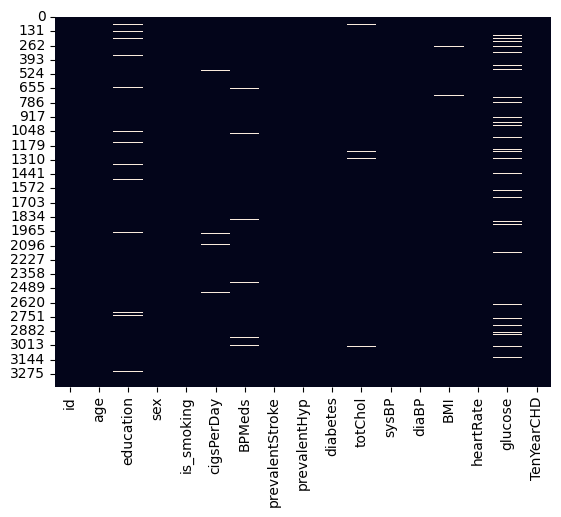

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset_cardio.isnull(), cbar=False)

### What did you know about your dataset?

1. The dataset contain 3390 rows and 17 columns. Among 17 column 15 having numeric data and 2 having categorical data.
2. There are 510 which have null values. Education, cigsPerDay,BPMeds,BMI, heartRate, glucose column having missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset_cardio.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset_cardio.describe(include='all')# describe will generate descriptive statistics of each column

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Variables Description

1. id:- It refers to ID of person.
2. Sex:- It gives sex of person(Categorical).
3. education:- It tells education of person.
4. Age:- It tells age of person.
5. is_smoking :- It tells whether person is smoking or not (Categorical).
6. Cigs_Per_Day:- It gives amount of cigerate smoke by person per day.
7. BP_Meds:- It tells us whether person is taking BP medicine or not.
8. Prevalent Stroke:- It tells us if the person is having history of stroke.
9. Prevalent hyp:-It tells us if the person is having history of hypertension.
10. Diabetes:- It tells us if the person is having Diabetes or not.
11. Tot Chol:- It refers to measure of cholestrol.
12. Sys BP:- It tells BP measure.
13. Dia BP:- It tells BP measure.
14. BMI:- It refers to Body mass Index.
15. glucose:- It refers to glucose measure of person.
16. heartRate:- It refers to heartrate measure of person.
17. TenYearCHD:- It tells whether person will have 10 year risk of future coronary heart disease.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset_cardio.columns.tolist():
  print("No. of unique values in ",i,"is",dataset_cardio[i].nunique(),".")   #nunique gives no. of distinct elements in each column.

No. of unique values in  id is 3390 .
No. of unique values in  age is 39 .
No. of unique values in  education is 4 .
No. of unique values in  sex is 2 .
No. of unique values in  is_smoking is 2 .
No. of unique values in  cigsPerDay is 32 .
No. of unique values in  BPMeds is 2 .
No. of unique values in  prevalentStroke is 2 .
No. of unique values in  prevalentHyp is 2 .
No. of unique values in  diabetes is 2 .
No. of unique values in  totChol is 240 .
No. of unique values in  sysBP is 226 .
No. of unique values in  diaBP is 142 .
No. of unique values in  BMI is 1259 .
No. of unique values in  heartRate is 68 .
No. of unique values in  glucose is 132 .
No. of unique values in  TenYearCHD is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

####3.1 Handling Missing Value

#####3.1.1 Handling Missing Value in Education Column

In [ ]:
# Write your code to make your dataset analysis ready.
dataset_cardio['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

 In the education column I will replace it with mode value i.e. 1.

In [ ]:
dataset_cardio["education"].fillna(1, inplace = True)

#####3.1.2 Handling Missing Value in cigsPerDay

In [ ]:
dataset_cardio['cigsPerDay'].value_counts()

0.0     1703
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64

Here, I will replace with "0" if is_smoking is False else I will replace with median value.

In [ ]:
#taking index of rows whose 'cigsPerDay' column having null value
null_cigsPerDay = dataset_cardio[(pd.isnull(dataset_cardio['cigsPerDay'])) ].index

In [ ]:
df2=dataset_cardio.take(null_cigsPerDay)
print(df2)

        id  age  education sex is_smoking  cigsPerDay  BPMeds  \
422    422   55        1.0   F        YES         NaN     0.0   
466    466   45        3.0   M        YES         NaN     0.0   
469    469   42        1.0   M        YES         NaN     0.0   
491    491   61        1.0   F        YES         NaN     0.0   
538    538   41        1.0   F        YES         NaN     0.0   
767    767   54        1.0   M        YES         NaN     0.0   
1461  1461   47        2.0   F        YES         NaN     0.0   
1467  1467   49        1.0   F        YES         NaN     0.0   
1597  1597   57        1.0   F        YES         NaN     0.0   
1986  1986   49        2.0   F        YES         NaN     0.0   
2031  2031   58        4.0   F        YES         NaN     0.0   
2087  2087   49        4.0   M        YES         NaN     0.0   
2240  2240   47        3.0   F        YES         NaN     0.0   
2284  2284   45        2.0   M        YES         NaN     0.0   
2527  2527   58        2.

Here, I have found that we have null value for "cigPerday" column those rows having "is_smoking" column value "yes" so I will replace with mode of patient whose "is_smoking" is "yes".

In [ ]:
#replacing null values with median of of patient whose "is_smoking" is "yes".
dataset_cardio['cigsPerDay'] = dataset_cardio['cigsPerDay'].fillna(dataset_cardio[dataset_cardio['is_smoking']=='YES']['cigsPerDay'].mode())

#####3.1.3 Handling Missing Value in BPMeds

In [ ]:
dataset_cardio['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

Here, I will replace null value with '0'

In [ ]:
dataset_cardio["BPMeds"].fillna(0, inplace = True)

#####3.1.4 Handling Missing Value in totChol

In [ ]:
dataset_cardio['totChol'].value_counts()

240.0    65
210.0    51
220.0    48
260.0    46
232.0    45
         ..
137.0     1
113.0     1
392.0     1
353.0     1
364.0     1
Name: totChol, Length: 240, dtype: int64

In [ ]:
dataset_cardio["totChol"].fillna(dataset_cardio["totChol"].median(), inplace = True)

#####3.1.5 Handling Missing Value in glucose

In [ ]:
dataset_cardio['glucose'].value_counts()

75.0     149
83.0     135
70.0     123
77.0     122
80.0     118
        ... 
191.0      1
119.0      1
43.0       1
256.0      1
274.0      1
Name: glucose, Length: 132, dtype: int64

Here I will replace null value with median value.

In [ ]:
dataset_cardio["glucose"].fillna(dataset_cardio["glucose"].median(), inplace = True)

#####3.1.5 Handling Missing Value in BMI

In [ ]:
dataset_cardio['BMI'].value_counts()

22.91    17
22.54    16
22.19    15
23.48    12
25.09    12
         ..
19.54     1
19.87     1
35.01     1
21.29     1
31.09     1
Name: BMI, Length: 1259, dtype: int64

Here I will replace null value with median value.

In [ ]:
dataset_cardio["BMI"].fillna(dataset_cardio["BMI"].median(), inplace = True)

#####3.1.5 Handling Missing Value in heartrate

In [ ]:
dataset_cardio['heartRate'].value_counts()

75.0     442
80.0     298
70.0     241
85.0     191
72.0     184
        ... 
47.0       1
143.0      1
51.0       1
140.0      1
97.0       1
Name: heartRate, Length: 68, dtype: int64

Here I will replace null value with median value.

In [ ]:
dataset_cardio["heartRate"].fillna(dataset_cardio["heartRate"].median(), inplace = True)

In [ ]:
dataset_cardio.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3368.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,1694.500000,49.542183,1.946018,9.069477,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,978.753033,8.592878,1.017568,11.879078,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### What all manipulations have you done and insights you found?

1.   I have replaced education column null value with mode value.
2.   I have replaced cigsPerDay column null value with mode value.
3.   I have replaced BPMeds, totChol, glucose, BMI, heartrate column null value with median value.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## ***4.1 Univariate Analysis***

#### Chart - 1 Univariate Analysis:-TenYearCHD

0    0.849263
1    0.150737
Name: TenYearCHD, dtype: float64
 


<Axes: ylabel='TenYearCHD'>

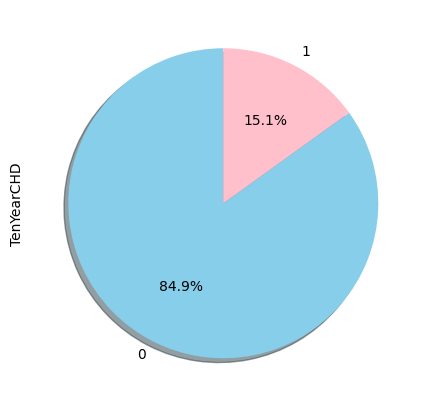

In [ ]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(dataset_cardio.TenYearCHD.value_counts(normalize=True)) #This will gives us no. of occurance of each unique value from TenYearCHD column
print(" ")
# Dependant Variable Column Visualization
dataset_cardio['TenYearCHD'].value_counts().plot(kind='pie',
                              figsize=(5,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['0','1'],
                               colors=['skyblue','pink'],
                               explode=[0,0]
                              )#plotting pie chart of TenYearCHD column

##### 1. Why did you pick the specific chart?

A pie chart is a graph that represents the data in circular graph. The pie means whole and slice means the part of whole. The slices of pie shows the relative size of the data. A pie chart requires a list of categorical variables and numerical variables. TenYearCHD has categorical variable. In order to find percentage of person with having possibality of ten year coronary disease, I used pie chart.

##### 2. What is/are the insight(s) found from the chart?

1. Around 84.9% people donot have 10 year risk of future coronary heart disease and 15.1% people having risk of future coronary heart disease.
2. The value "0" means there is no risk of Coronary heart disease,
   "1" refers to risk of coronary heart disease.
3. The given data is imbalance dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 Univariate analysis (prevalentStroke, sex , is_smoking , BPMeds ,prevalentHyp , diabetes ) Categorical


0    0.99351
1    0.00649
Name: prevalentStroke, dtype: float64


F    0.567257
M    0.432743
Name: sex, dtype: float64


NO     0.50236
YES    0.49764
Name: is_smoking, dtype: float64


0.0    0.970501
1.0    0.029499
Name: BPMeds, dtype: float64


0    0.684661
1    0.315339
Name: prevalentHyp, dtype: float64


0    0.974336
1    0.025664
Name: diabetes, dtype: float64



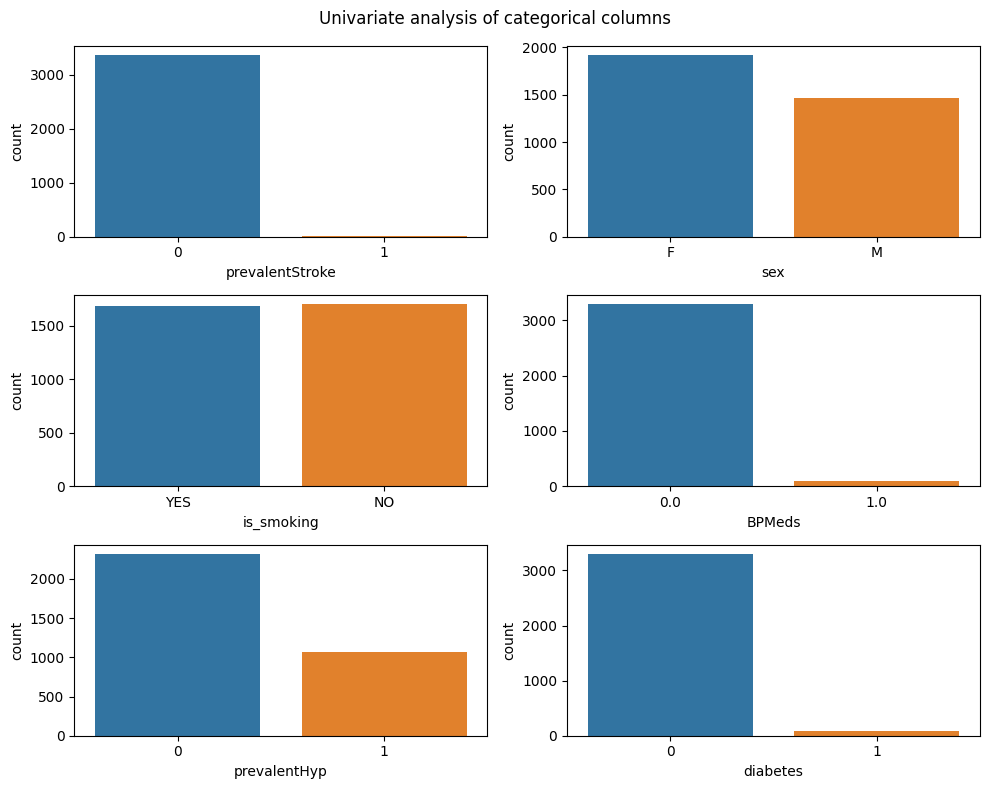

In [ ]:
# Chart - 2 visualization code
# visualisation code for univariate analysis of categorical column
list_categorical_column=['prevalentStroke', 'sex' , 'is_smoking' , 'BPMeds' ,'prevalentHyp' , 'diabetes' ]

plt.figure(figsize = (10,8));
plt.suptitle('Univariate analysis of categorical columns')
for i,column in enumerate(list_categorical_column) :
    print("")
    print( dataset_cardio[column].value_counts(normalize=True))
    print("")
    plt.subplot(3,2,i+1)
    sns.countplot(x = column, data=dataset_cardio)
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show number of Person per each Categorical column I used Bar chart.

##### 2. What is/are the insight(s) found from the chart?

1. Around 99% people do not have previous stroke history.
2. In sex column value F referes to female and value "M" refers to male. There are approximate 56% females and 44% are male.
3. 50% peoples are smoking.
4. 97% of people are not taking BP medicine.
5. 68% are having hypertension
6. 97% are having diabetes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It helps to find how the data is distributed in discrete variable.

#### Chart - 3 Univariate Analysis (age, cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, glucose) Numerical

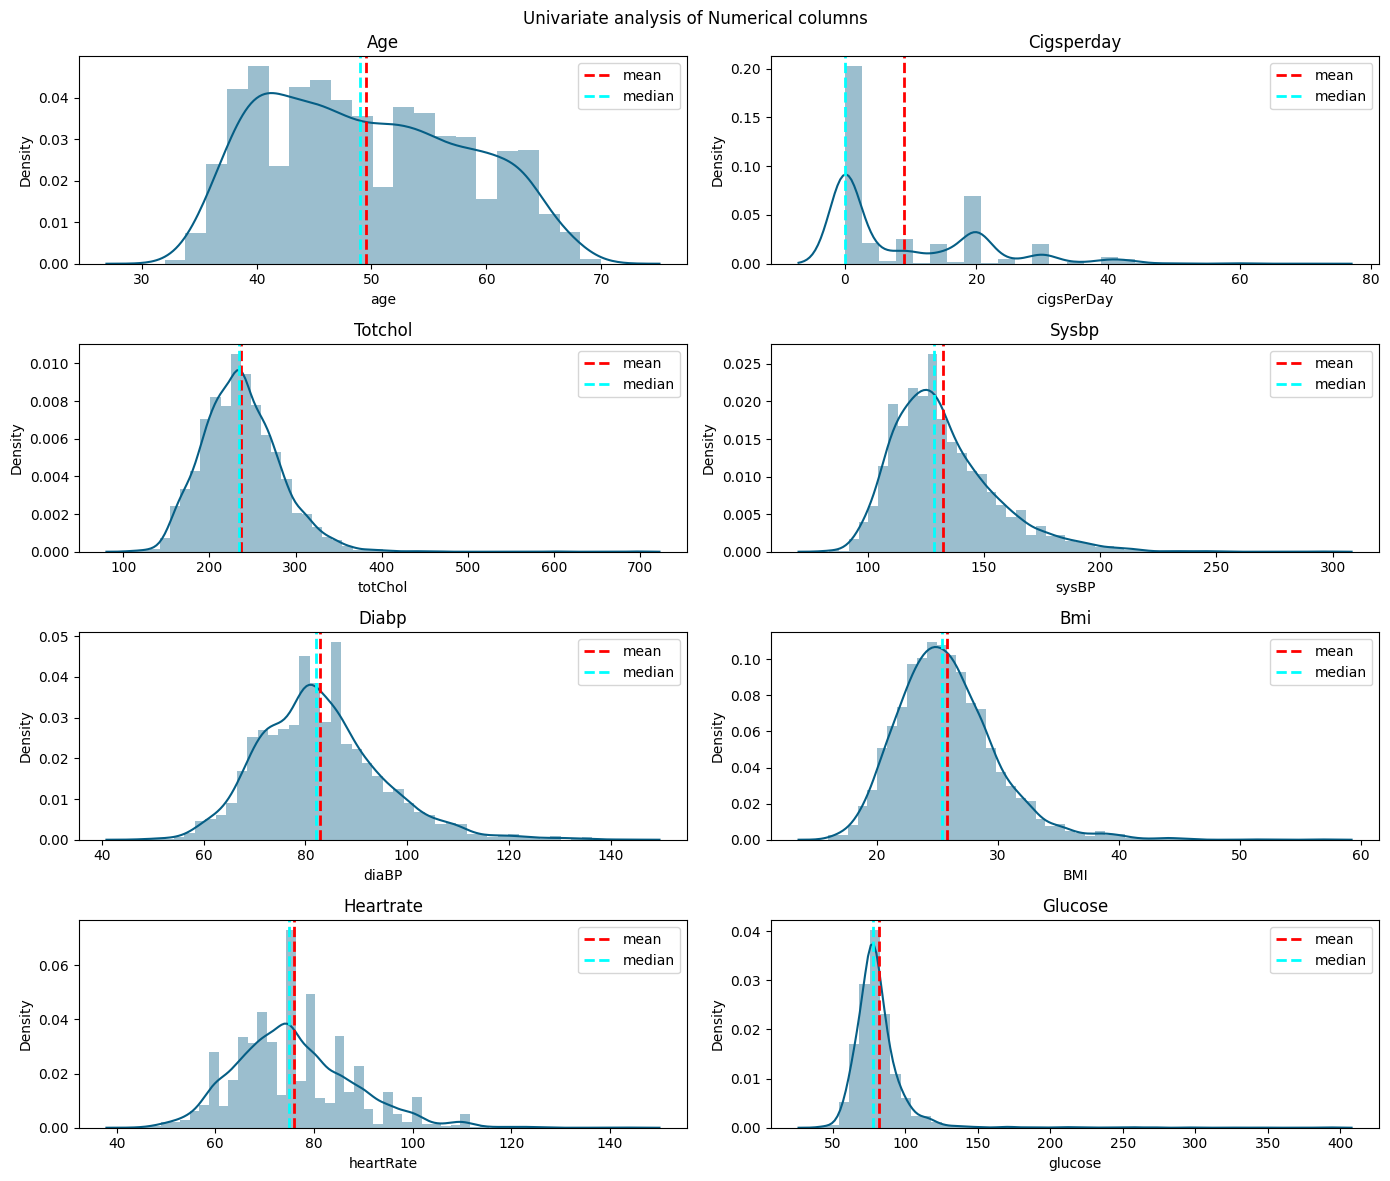

In [ ]:
# Chart - 3 visualization code
# visualisation code for univariate analysis of numerical column
list_numerical_column=['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate' , 'glucose']

plt.figure(figsize = (14,12));
plt.suptitle('Univariate analysis of Numerical columns')
for i,column in enumerate(list_numerical_column):

    plt.subplot(4,2,i+1);
    sns.distplot(dataset_cardio[column], color = '#055E85');
    plt.axvline(dataset_cardio[column].mean(), color='red', linestyle='dashed', linewidth=2,label= 'mean');  #red
    plt.axvline(dataset_cardio[column].median(), color='cyan', linestyle='dashed', linewidth=2,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{column.title()}');
    plt.tight_layout();

##### 1. Why did you pick the specific chart?

Distribution plots are used  for visualizing the distribution of data. It helps to find the shape of distribution of data, the presense of outlier.

##### 2. What is/are the insight(s) found from the chart?

1. Only CigsPerday column having skewed distribution, rest having normal distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It helps to find whether attribute require transformation of data.

## ***4.2 Bivariate Analysis***

#### Chart - 4 Bivariate analysis (prevalentStroke, sex , is_smoking , BPMeds ,prevalentHyp , diabetes ) Categorical with TenYearCHD (dependant Variable)

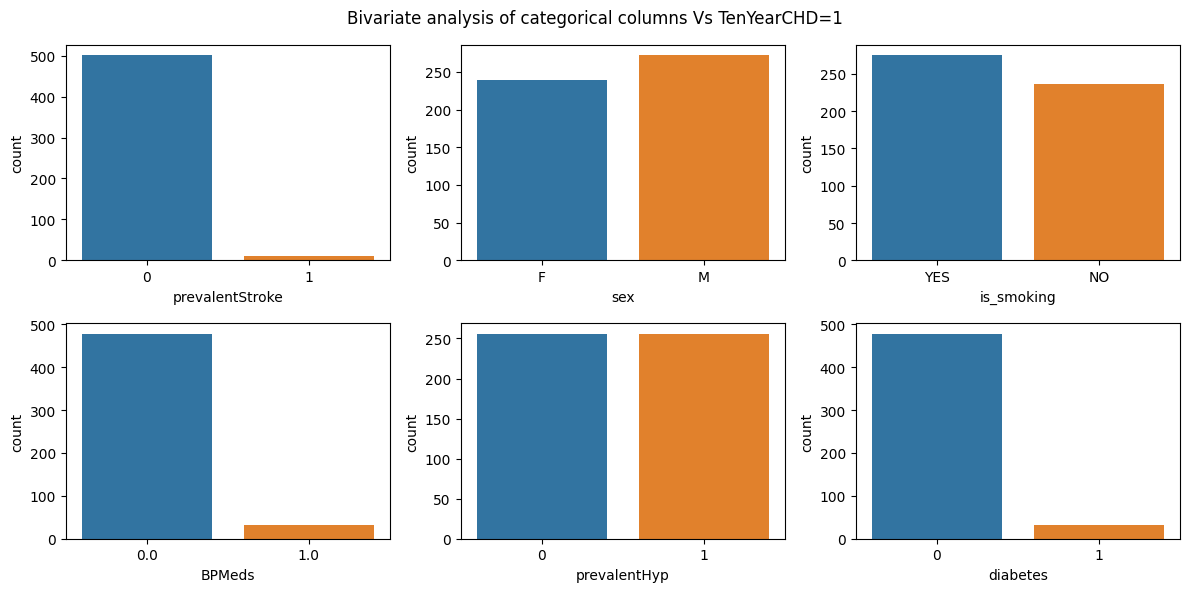

In [ ]:
# Chart - 4 visualization code

list_categorical_column=['prevalentStroke', 'sex' , 'is_smoking' , 'BPMeds' ,'prevalentHyp' , 'diabetes' ]

df_TenYearCHD_Y=dataset_cardio[dataset_cardio["TenYearCHD"]==1]
plt.figure(figsize = (12,6));
plt.suptitle('Bivariate analysis of categorical columns Vs TenYearCHD=1')
for i,column in enumerate(list_categorical_column) :

    plt.subplot(2,3,i+1)
    sns.countplot(x = column, data=df_TenYearCHD_Y)
    plt.tight_layout()

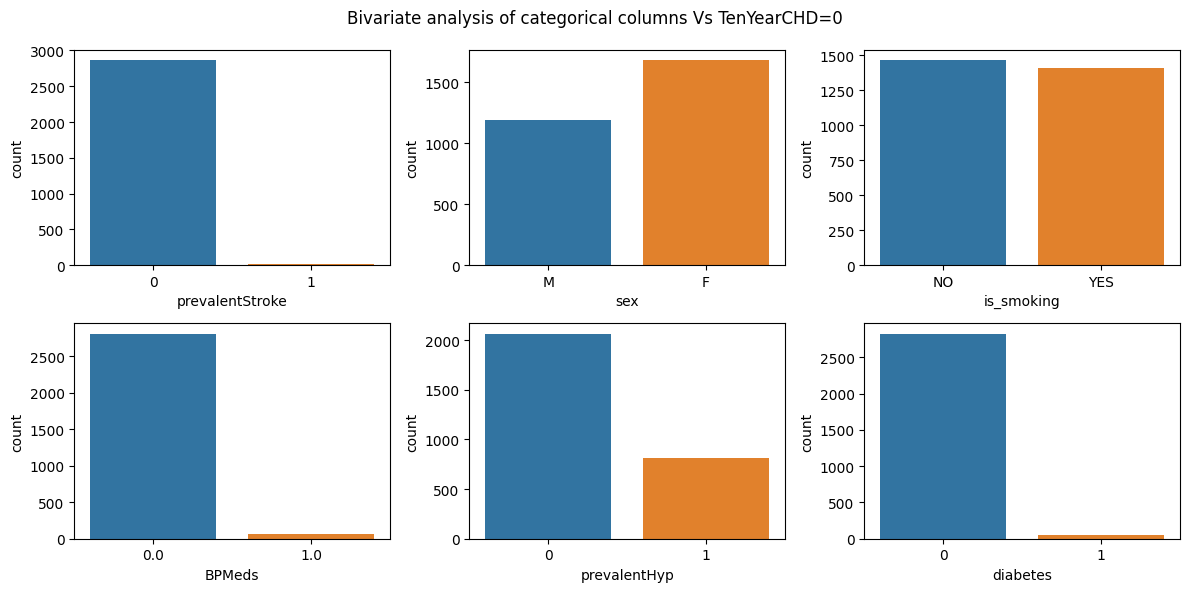

In [ ]:
list_categorical_column=['prevalentStroke', 'sex' , 'is_smoking' , 'BPMeds' ,'prevalentHyp' , 'diabetes' ]

df_TenYearCHD_N=dataset_cardio[dataset_cardio["TenYearCHD"]==0]
plt.figure(figsize = (12,6));
plt.suptitle('Bivariate analysis of categorical columns Vs TenYearCHD=0')
for i,column in enumerate(list_categorical_column) :

    plt.subplot(2,3,i+1)
    sns.countplot(x = column, data=df_TenYearCHD_N)
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show number of Person per each Categorical column vs TenYearCHD=1 I used Bar chart.

##### 2. What is/are the insight(s) found from the chart?

1. The person who is having risk of TenYearCHD got the following observation
 *   Male person are more compared to female person.
 *   There are more chances of people who are smoking compared to people are smoking.
 * There are 50-50% chances of people having hypertesion.

2.  People donot have stroke history and people donot take Bp medicine , pople donot have diabetes and dnpt have hyper tension also having less chance of risk of TenYearCHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this observation can be useful for preventive measure in future coronary heart disease.

#### Chart - 5 Bivariate analysis ('age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate' , 'glucose')Numerical with TenYearCHD (dependant Variable)

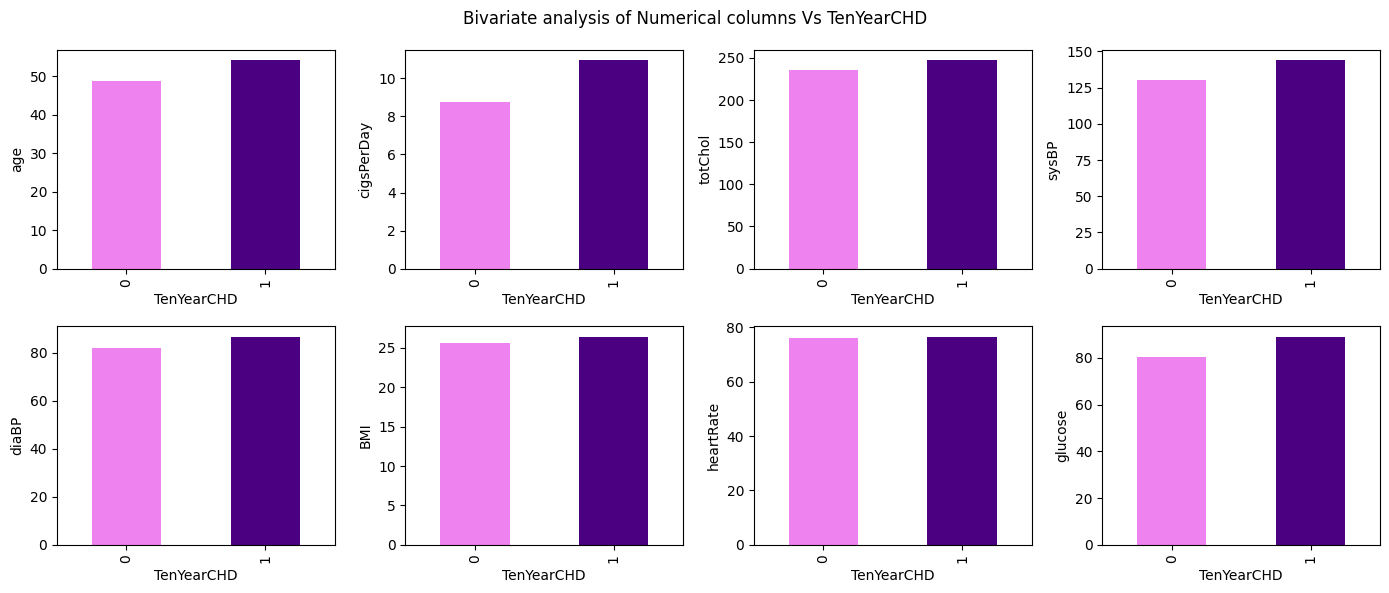

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize = (14,6));
plt.suptitle('Bivariate analysis of Numerical columns Vs TenYearCHD')
for i,column in enumerate(list_numerical_column):
    lstTenYearCHD=(dataset_cardio.groupby(['TenYearCHD'])[column].mean()).reset_index()['TenYearCHD'].values. tolist() # taking unique value of TenYearCHD in list
    xaxis = np.arange(len(lstTenYearCHD)) # taking xaxis value from 0 to length of unique key - 1
    plt.subplot(2,4,i+1);

    # plotting bar chart of numerical column vs TenYearCHD
    plt.rcParams['figure.figsize'] = (5, 6)# setting chart/figure size
    color = plt.cm.copper(np.linspace(0, 0.5, 20))
    (dataset_cardio.groupby(['TenYearCHD'])[column].mean()).plot.bar(color = ['violet','indigo'])

    plt.xlabel("TenYearCHD", fontsize = 10)# xlabel for bar chart
    plt.ylabel(column, fontsize = 10)# ylabel for bar chart
   # plt.xticks(xaxis, lstTenYearCHD,rotation=0)# to set tick location and labels of x axis.
    plt.tight_layout();

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show comparision  of median of numerical column with dependant variable I used Bar chart.

##### 2. What is/are the insight(s) found from the chart?

From the above barchart I got the following observation.
1. Mean of Age,cigPerDay,glucose of person having TenYearCHD is greater than mean of person not having TenYearCHD.

2.  Mean totchol, sysBP, diaBP,BMI of person having TenYearCHD is slightly greater than Mean of person not having TenYearCHD.

3. Mean heartrate of person having TenYearCHD is  approximately equal to Mean of person not having TenYearCHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can be useful for identifying potential risk factors for heart disease

###4.3 Multivariate Analysis

#### Chart - 6 Multivariate Analysis (totchol,diabetes, TenYearCHD)

   TenYearCHD  diabetes  totChol
0           1         1    258.0
1           1         0    241.0
2           0         1    238.5
3           0         0    233.0



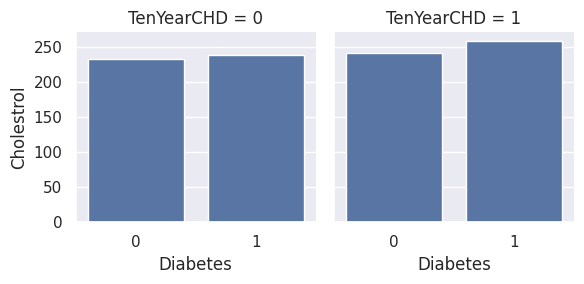

In [ ]:
# Chart - 6 visualization code
# grouping with totChol and TenYearCHD and diabetes column
df_gf_totchol_vs_diabetes= dataset_cardio.groupby(['TenYearCHD','diabetes'])['totChol'].median().sort_values(ascending = False).reset_index()

print(df_gf_totchol_vs_diabetes)
print("")
sns.set(font_scale=1)#setting font_scale of seaborn diagram is 1
g = sns.FacetGrid(df_gf_totchol_vs_diabetes, col="TenYearCHD",height=3,margin_titles=True)# taking facetgrid object to plot conditional relationships.
g.map_dataframe(sns.barplot, x="diabetes", y="totChol")#plotting barplot
g.set_xlabels('Diabetes')# setting xlabel
g.set_ylabels('Cholestrol') # setting ylabel

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally.  In order show comparision of cholestrol value of with diabetes patient I used bar chart

##### 2. What is/are the insight(s) found from the chart?

1. Median of cholestrol of people who is having diabetes  and risk of TenYearCHD is higher compared to people who dont have diabetes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. High cholestrol and having diabetes lead to having risk of TenYearCHD. This information is helpful to finding risk of heart disease.

#### Chart - 7 Multivariate Analysis (glucose,diabetes, TenYearCHD)

   TenYearCHD  diabetes  glucose
0           1         1    206.0
1           0         1    122.0
2           0         0     78.0
3           1         0     78.0



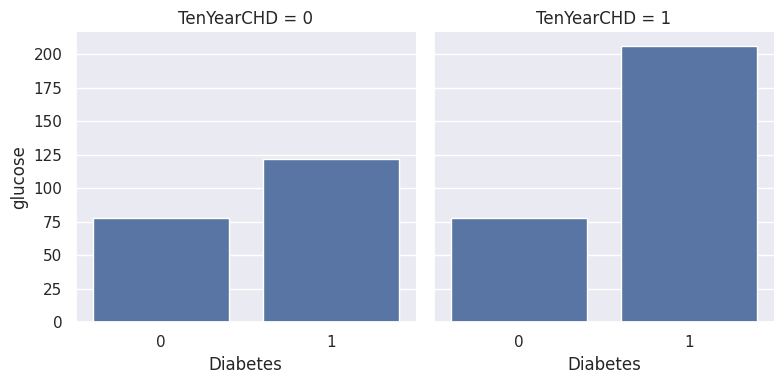

In [ ]:
# Chart - 7 visualization code
# grouping with totChol and TenYearCHD and diabetes column
df_gf_glucose_vs_diabetes= dataset_cardio.groupby(['TenYearCHD','diabetes'])['glucose'].median().sort_values(ascending = False).reset_index()

print(df_gf_glucose_vs_diabetes)
print("")
sns.set(font_scale=1)#setting font_scale of seaborn diagram is 1
g = sns.FacetGrid(df_gf_glucose_vs_diabetes, col="TenYearCHD",height=4,margin_titles=True)# taking facetgrid object to plot conditional relationships.
g.map_dataframe(sns.barplot, x="diabetes", y="glucose")#plotting barplot
g.set_xlabels('Diabetes')# setting xlabel
g.set_ylabels('glucose') # setting ylabel

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally.  In order show comparision of Glucose value of with diabetes patient I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

Text(0.5, 1.0, 'Co-relation of the columns')

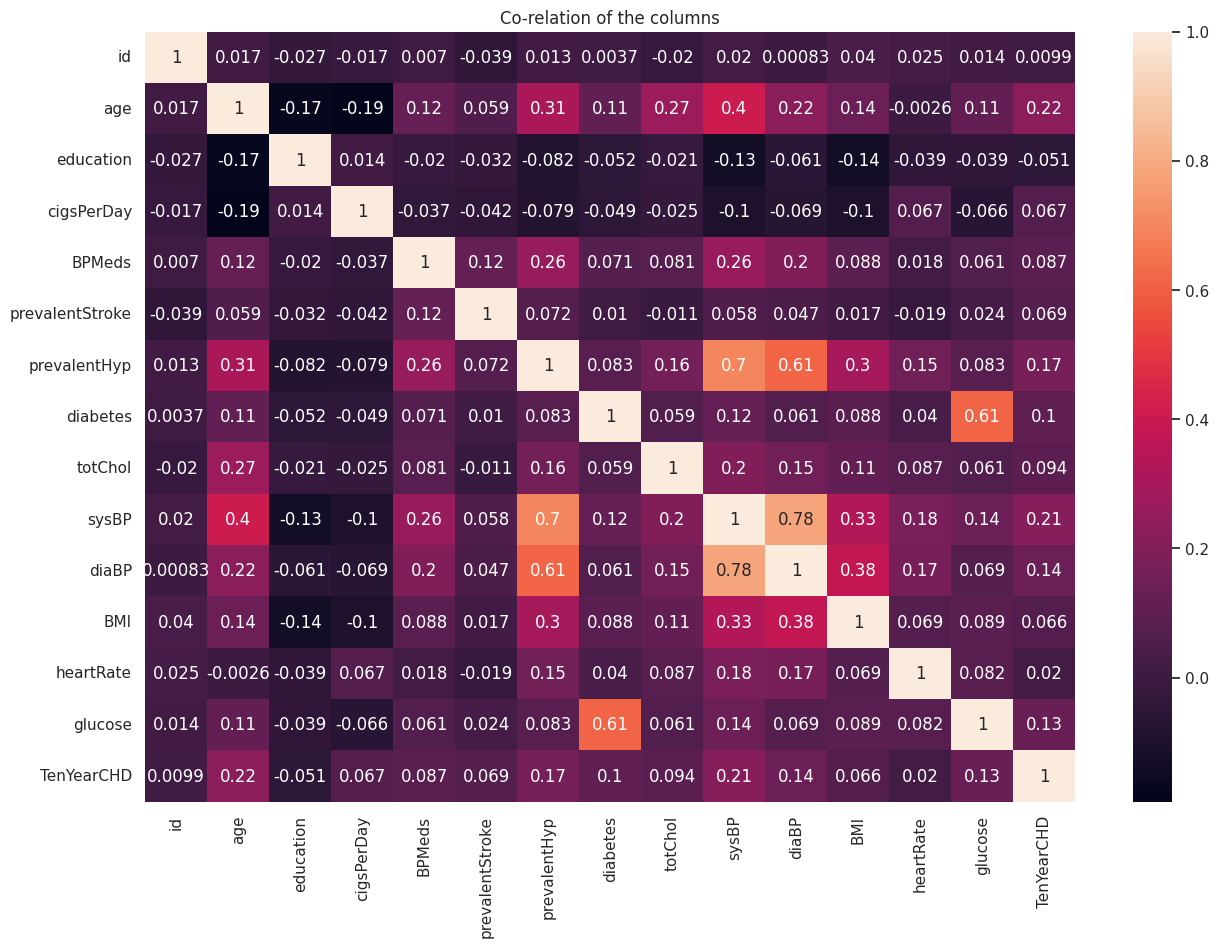

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10)) # setting chart/figure size
sns.heatmap(dataset_cardio.corr(),annot=True) # plot heatmap
plt.title('Co-relation of the columns') # plotting title

##### 1. Why did you pick the specific chart?

A correlation matrix is a square matrix showing the correlation coefficients between two variables.The strength and direction of the relationship between two variables in a straight line are determined by the correlation coefficient. In multivariate analysis and statistics, a correlation matrix is typically used to explore the relationships between several variables

##### 2. What is/are the insight(s) found from the chart?

1. prevalentHyp is positively correlated with sysBP and diaBP.
2. SysBP is highly correlated with diaBP .
3. Diabetes is positively correlated with glucose.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
df_numeric=dataset_cardio[['age',  'cigsPerDay', 'BPMeds',
        'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD' ]]
# Pair Plot visualization code
sns.pairplot(df_numeric, hue="TenYearCHD")

##### 1. Why did you pick the specific chart?

Pair plots are used to determine the best combination of features to describe a connection between two variables. Additionally, it is beneficial to create some straightforward classification models by making linear separations in our data or drawing some simple lines.

##### 2. What is/are the insight(s) found from the chart?

From the pair plot I can say data is not linearly seperable.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***